# Converting Color Spaces

As discussed earlier, images are just numpy arrays. The numbers in those arrays correspond to the intensity of each pixel (or, in the case of a color image, the intensity of a specific color). To manipulate these, `scikit-image` provides the `color` and `exposure` modules.

In [2]:
import skimage
from skimage import data
from skimage import io

import numpy as np
import matplotlib.pyplot as plt

## Loading image from skimage

(512, 512, 3)


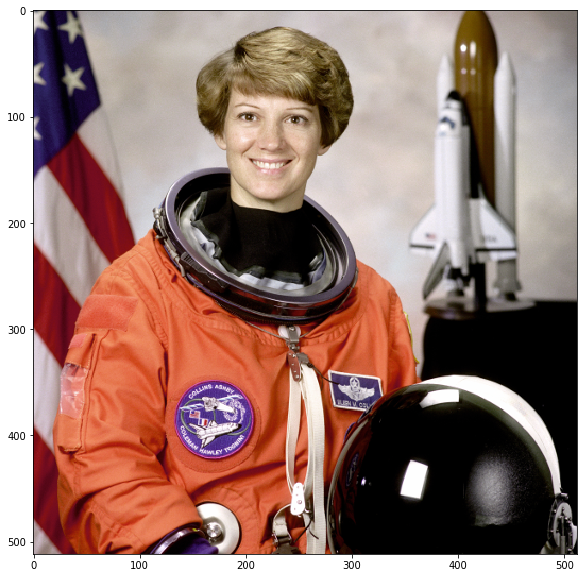

In [3]:
astronaut = data.astronaut()

print(astronaut.shape)
plt.figure(figsize = (12, 10))
plt.imshow(astronaut);

## Set brighter pixels to blue

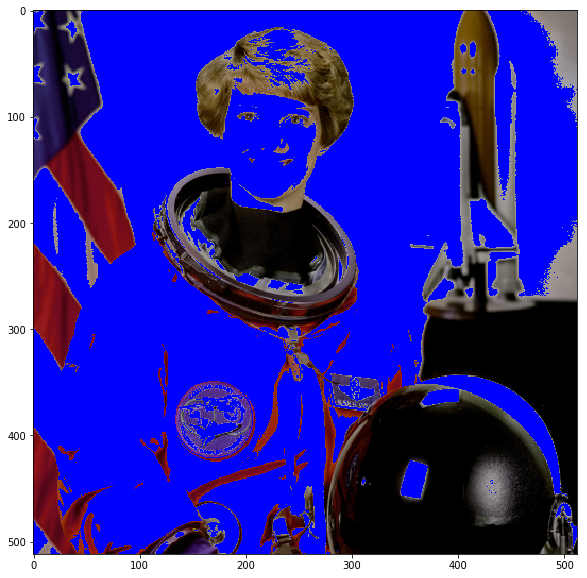

In [4]:
blue_astronaut = astronaut.copy()

blueish = astronaut[:, :, 0] > 160
blue_astronaut[blueish] = [0, 0, 255]

plt.figure(figsize = (12, 10))
plt.imshow(blue_astronaut);

In [5]:
blue_astronaut

array([[[154, 147, 151],
        [109, 103, 124],
        [ 63,  58, 102],
        ...,
        [127, 120, 115],
        [120, 117, 106],
        [125, 119, 110]],

       [[  0,   0, 255],
        [144, 141, 143],
        [113, 114, 124],
        ...,
        [127, 118, 112],
        [124, 115, 108],
        [121, 116, 105]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [128, 120, 117],
        [126, 116, 112],
        [124, 114, 109]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   1],
        [  0,   0,   0]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0,   1],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0]]

## Invert (or complement) an image

Invert the intensity range of the input image, so that the dtype maximum is now the dtype minimum, and vice-versa. 

In [6]:
from skimage import util

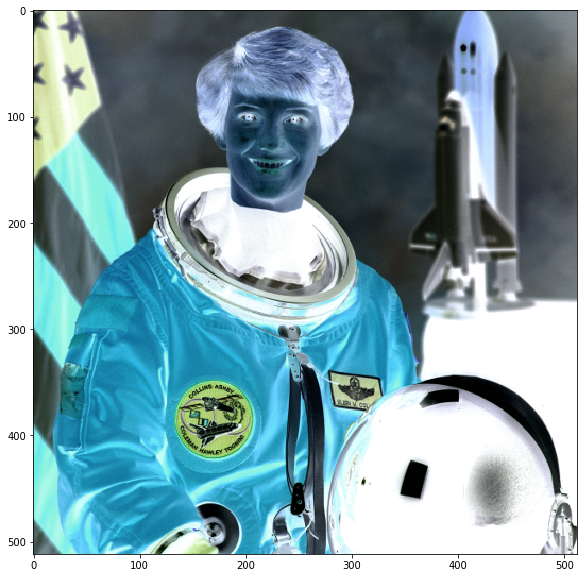

In [7]:
inverted_astronaut = util.invert(astronaut)

plt.figure(figsize = (12, 10))
plt.imshow(inverted_astronaut)

In [8]:
inverted_astronaut

array([[[101, 108, 104],
        [146, 152, 131],
        [192, 197, 153],
        ...,
        [128, 135, 140],
        [135, 138, 149],
        [130, 136, 145]],

       [[ 78,  84,  84],
        [111, 114, 112],
        [142, 141, 131],
        ...,
        [128, 137, 143],
        [131, 140, 147],
        [134, 139, 150]],

       [[ 54,  61,  62],
        [ 73,  77,  80],
        [ 87,  90,  91],
        ...,
        [127, 135, 138],
        [129, 139, 143],
        [131, 141, 146]],

       ...,

       [[ 69,  85,  79],
        [ 69,  85,  78],
        [ 72,  87,  85],
        ...,
        [255, 255, 255],
        [255, 255, 254],
        [255, 255, 255]],

       [[ 72,  86,  85],
        [ 73,  88,  84],
        [ 70,  91,  79],
        ...,
        [255, 255, 254],
        [254, 254, 254],
        [255, 255, 255]],

       [[ 71,  88,  83],
        [ 72,  90,  86],
        [ 75,  93,  84],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [255, 255, 255]]

### Change RGB color to BGR

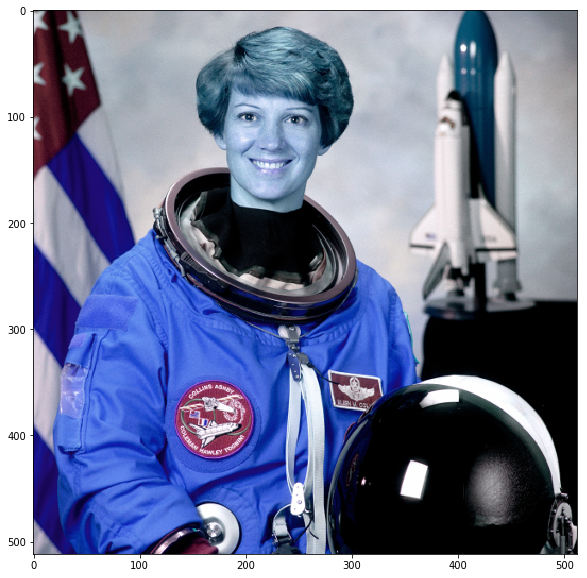

In [9]:
astronaut = data.astronaut()

BGR_astronaut = astronaut[:, :, ::-1]
plt.figure(figsize = (12, 10))
plt.imshow(BGR_astronaut);

### Convert to gray image

In [10]:
from skimage.color import rgb2gray

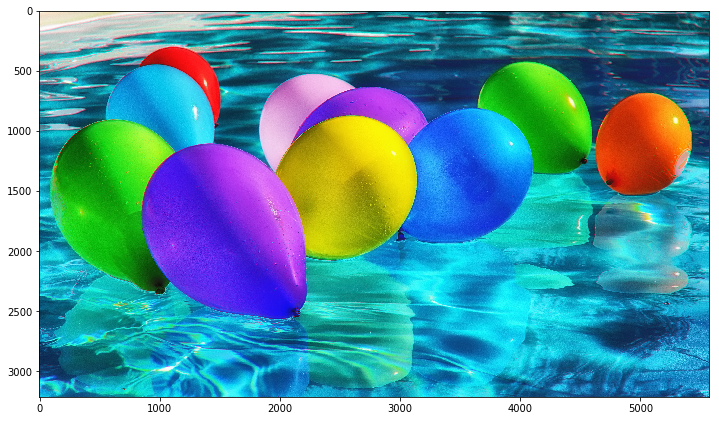

In [11]:
balloon = io.imread('datasets/images/balloons.jpg')

plt.figure(figsize = (12, 10))
plt.imshow(balloon)

In [12]:
balloon.shape

(3211, 5571, 3)

converting the image to gray changes the shape of the image

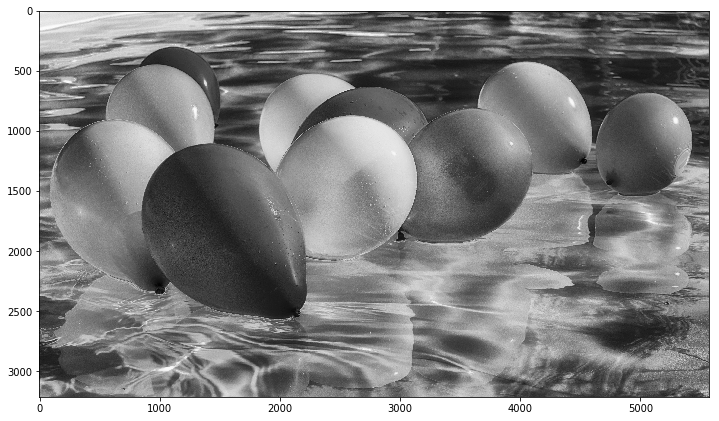

In [14]:
gray_balloon = rgb2gray(balloon)

plt.figure(figsize = (12, 10))
plt.imshow(gray_balloon, 'gray')

In [15]:
print(gray_balloon.shape)

(3211, 5571)


### Convert RGB to LAB

The CIELAB color space (also known as CIE L*a*b* or sometimes abbreviated as simply "Lab" color space) is a color space defined by the International Commission on Illumination (CIE) in 1976. It expresses color as three numerical values, L* for the lightness and a* and b* for the green–red and blue–yellow color components.
https://en.wikipedia.org/wiki/CIELAB_color_space

In [42]:
from skimage.color import rgb2lab

In [43]:
lab_image = rgb2lab(balloon)
lab_image.shape

(3211, 5571, 3)

In [44]:
type(lab_image)

numpy.ndarray

Converting the RGB to LAB, doesn't change the shape of the image

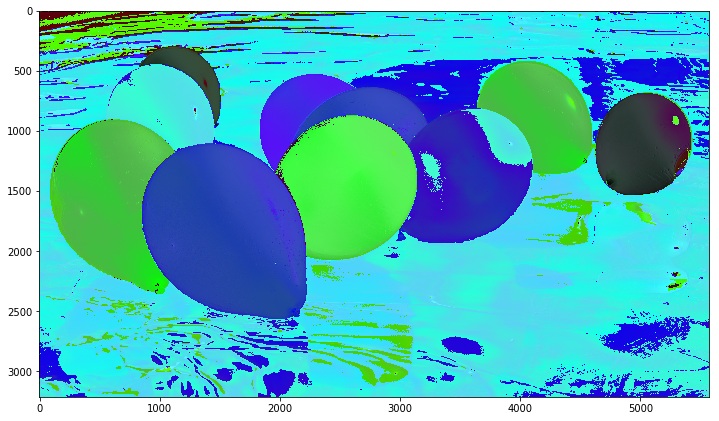

In [45]:
plt.figure(figsize = (12, 10))
plt.imshow(lab_image.astype(np.uint8));